<a href="https://colab.research.google.com/github/NawshinNeaha/AI-Lab/blob/main/Cardio_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
!pip install imbalanced-learn

In [ ]:
pip install tensorflow

In [ ]:

pip install scikeras

In [ ]:
pip install xgboost

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import time

from imblearn.over_sampling import SMOTE
from collections import Counter
import itertools

from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout,Activation,BatchNormalization
from scikeras import wrappers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_curve, auc as auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score,cross_val_predict, cross_validate
from sklearn.metrics import make_scorer,precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/cardiovascular_diseases_dv3.csv', sep=';')
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


# New Section

In [ ]:
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
df.tail()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
68778,53,2,168,76,120,80,1,1,1,0,1,0
68779,62,1,158,126,140,90,2,2,0,0,1,1
68780,52,2,183,105,180,90,3,1,0,1,0,1
68781,61,1,163,72,135,80,1,2,0,0,0,1
68782,56,1,170,72,120,80,2,1,0,0,1,0


In [ ]:
print(df.dtypes.value_counts())

int64    11
Name: count, dtype: int64


In [ ]:
df.duplicated().sum()

np.int64(3820)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.isnull().sum()

,0
AGE,0
GENDER,0
HEIGHT,0
WEIGHT,0
AP_HIGH,0
AP_LOW,0
CHOLESTEROL,0
GLUCOSE,0
SMOKE,0
ALCOHOL,0


EDA

In [ ]:
df.value_counts('CARDIO_DISEASE')

,count
CARDIO_DISEASE,
0,34742
1,34041


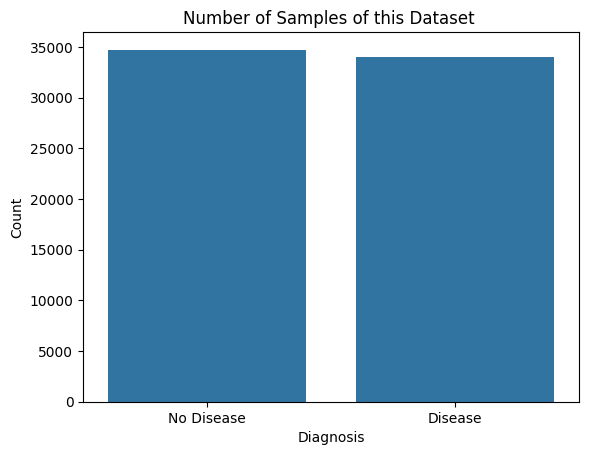

In [ ]:
import seaborn as sns
sns.countplot(x='CARDIO_DISEASE', data=original_df)
plt.title('Number of Samples of this Dataset ')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.savefig('Number_of_samples_of_this_Dataset.pdf', bbox_inches='tight')
plt.show()

In [ ]:
x = original_df.drop(columns=['CARDIO_DISEASE'],axis=1)
y = original_df['CARDIO_DISEASE']

In [ ]:
# Display the first few rows of the combined DataFrame
display(combined_df.head())

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY,CARDIO_DISEASE
0,50,2,168,62,110,80,1,1,0,0,1,0
1,55,1,156,85,140,90,3,1,0,0,1,1
2,52,1,165,64,130,70,3,1,0,0,0,1
3,48,2,169,82,150,100,1,1,0,0,1,1
4,48,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68783 entries, 0 to 68782
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   AGE                68783 non-null  int64
 1   GENDER             68783 non-null  int64
 2   HEIGHT             68783 non-null  int64
 3   WEIGHT             68783 non-null  int64
 4   AP_HIGH            68783 non-null  int64
 5   AP_LOW             68783 non-null  int64
 6   CHOLESTEROL        68783 non-null  int64
 7   GLUCOSE            68783 non-null  int64
 8   SMOKE              68783 non-null  int64
 9   ALCOHOL            68783 non-null  int64
 10  PHYSICAL_ACTIVITY  68783 non-null  int64
dtypes: int64(11)
memory usage: 5.8 MB


In [ ]:
df_encoded = pd.get_dummies(df,columns=['AGE', 'GENDER', 'HEIGHT', 'WEIGHT','AP_HIGH', 'AP_LOW', 'CHOLESTEROL', 'GLUCOSE','SMOKE', 'ALCOHOL', 'PHYSICAL_ACTIVITY'],drop_first=True
)

In [ ]:
# Convert 'bool' columns to int (True -> 1, False -> 0)
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Convert 'object' columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_cols = df.select_dtypes(include='object').columns

for col in object_cols:
    df[col] = df[col].astype(str)  # Ensure all values are strings
    df[col] = label_encoder.fit_transform(df[col])

# Check the result
print(df.head())
print(df.dtypes)

   AGE  GENDER  HEIGHT  WEIGHT  AP_HIGH  AP_LOW  CHOLESTEROL  GLUCOSE  SMOKE  \
0   50       2     168      62      110      80            1        1      0   
1   55       1     156      85      140      90            3        1      0   
2   52       1     165      64      130      70            3        1      0   
3   48       2     169      82      150     100            1        1      0   
4   48       1     156      56      100      60            1        1      0   

   ALCOHOL  PHYSICAL_ACTIVITY  
0        0                  1  
1        0                  1  
2        0                  0  
3        0                  1  
4        0                  0  
AGE                  int64
GENDER               int64
HEIGHT               int64
WEIGHT               int64
AP_HIGH              int64
AP_LOW               int64
CHOLESTEROL          int64
GLUCOSE              int64
SMOKE                int64
ALCOHOL              int64
PHYSICAL_ACTIVITY    int64
dtype: object


In [ ]:
df.head()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
0,50,2,168,62,110,80,1,1,0,0,1
1,55,1,156,85,140,90,3,1,0,0,1
2,52,1,165,64,130,70,3,1,0,0,0
3,48,2,169,82,150,100,1,1,0,0,1
4,48,1,156,56,100,60,1,1,0,0,0


In [ ]:

df.tail()

,AGE,GENDER,HEIGHT,WEIGHT,AP_HIGH,AP_LOW,CHOLESTEROL,GLUCOSE,SMOKE,ALCOHOL,PHYSICAL_ACTIVITY
68778,53,2,168,76,120,80,1,1,1,0,1
68779,62,1,158,126,140,90,2,2,0,0,1
68780,52,2,183,105,180,90,3,1,0,1,0
68781,61,1,163,72,135,80,1,2,0,0,0
68782,56,1,170,72,120,80,2,1,0,0,1


In [ ]:
num_cols = df.shape[1]

print("Number of columns:", num_cols)

Number of columns: 11


In [ ]:
num_cols = len(df.columns)  # ❌ This gives an integer

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

AGE
Skew : -0.31


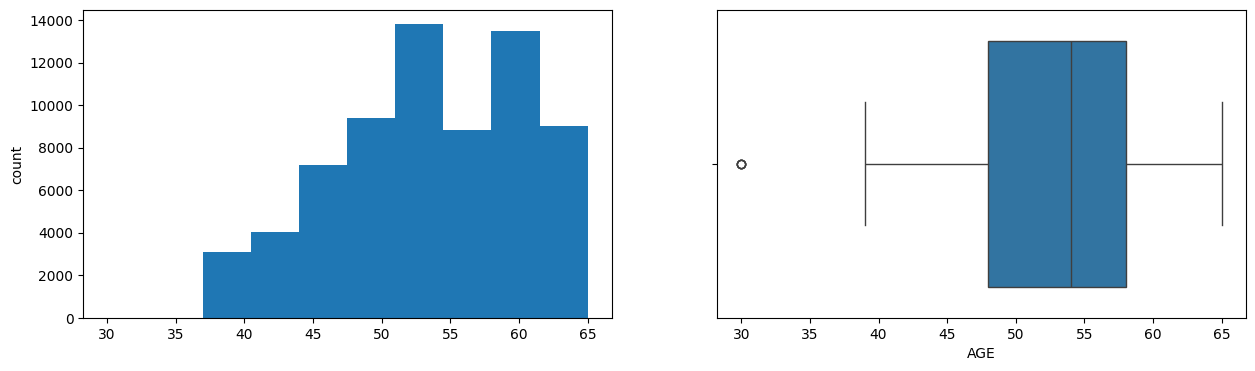

GENDER
Skew : 0.63


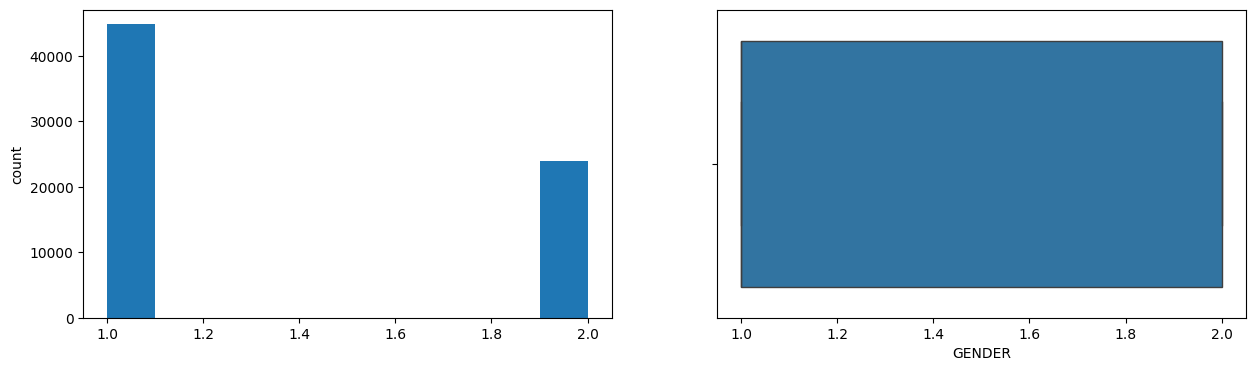

HEIGHT
Skew : -0.61


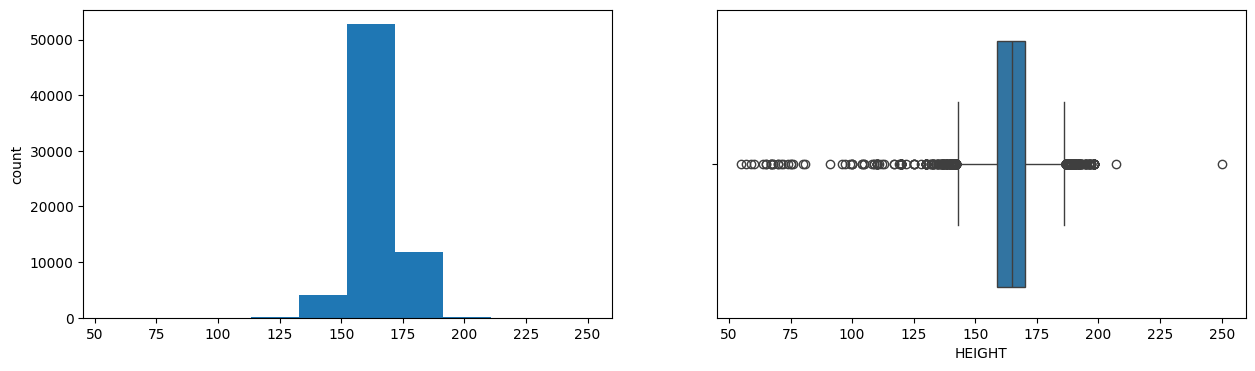

WEIGHT
Skew : 1.01


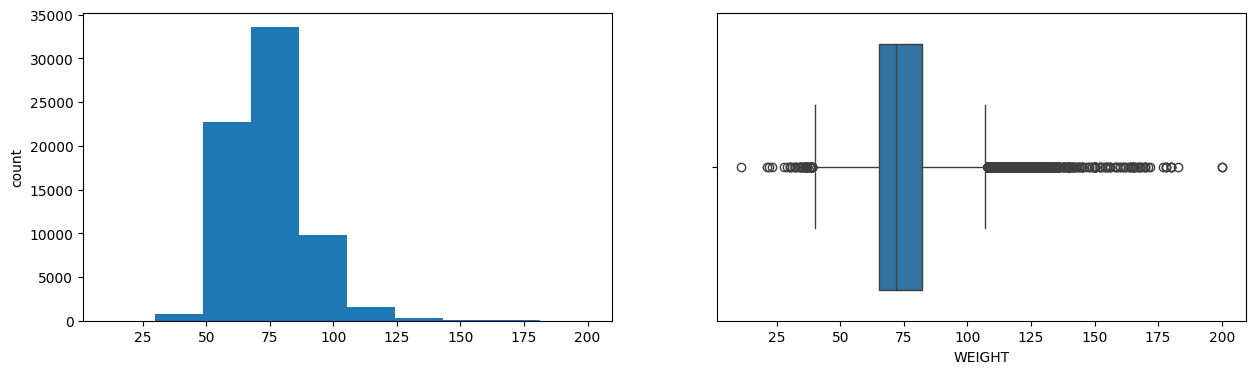

AP_HIGH
Skew : 0.91


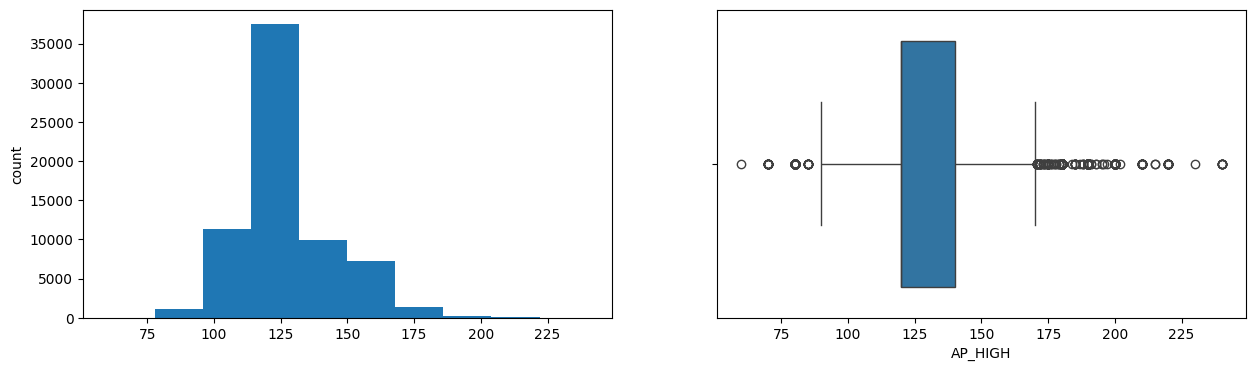

AP_LOW
Skew : 0.65


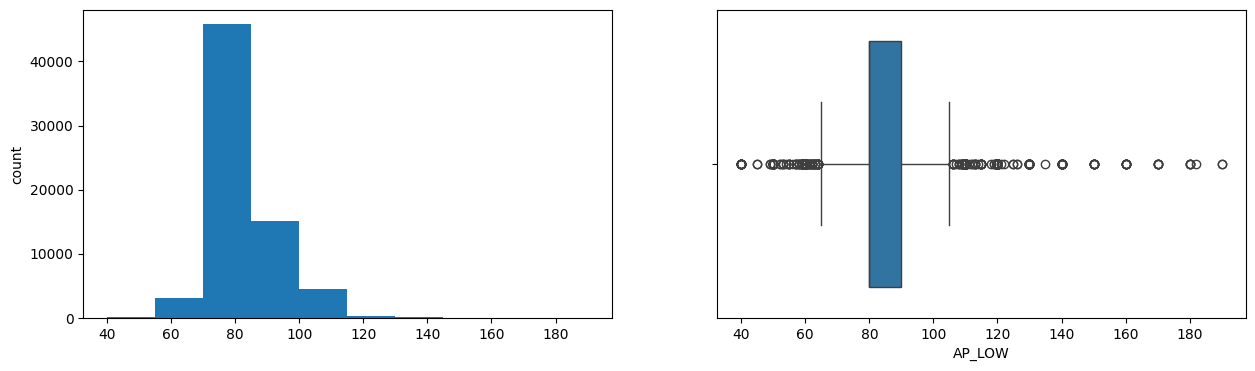

CHOLESTEROL
Skew : 1.6


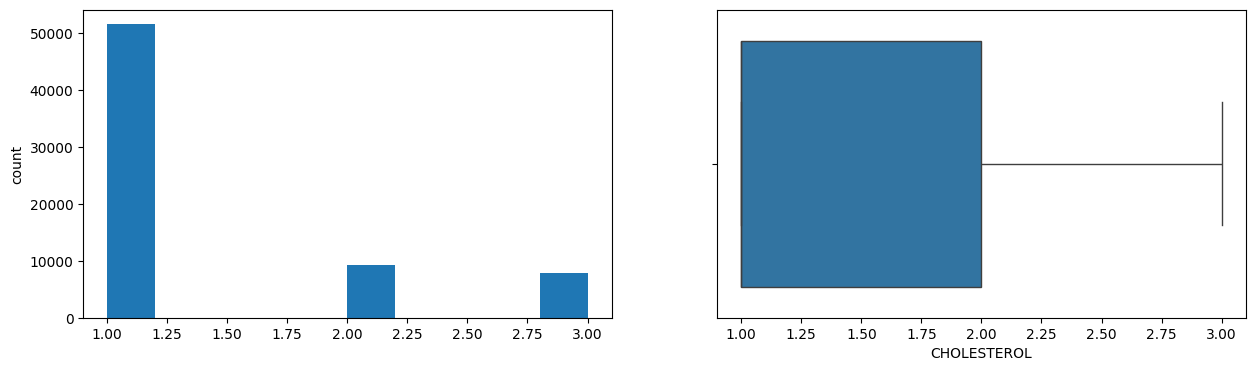

GLUCOSE
Skew : 2.4


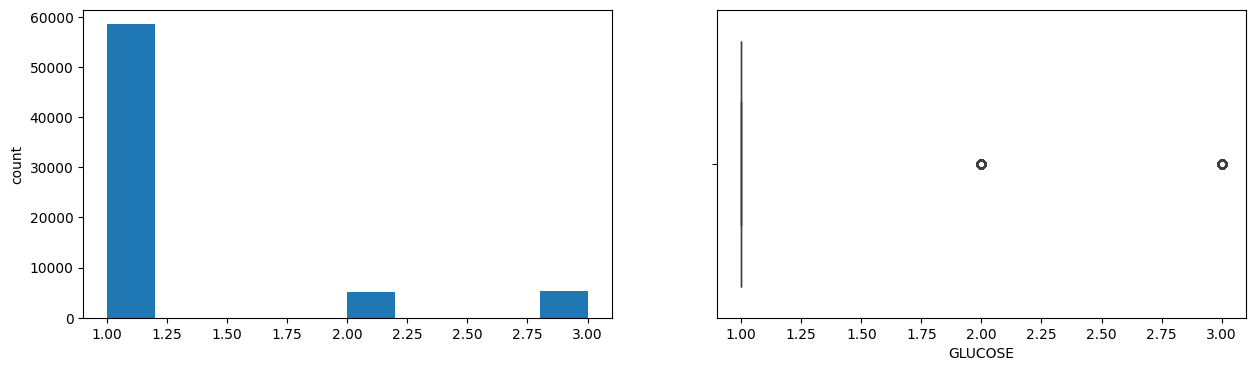

SMOKE
Skew : 2.91


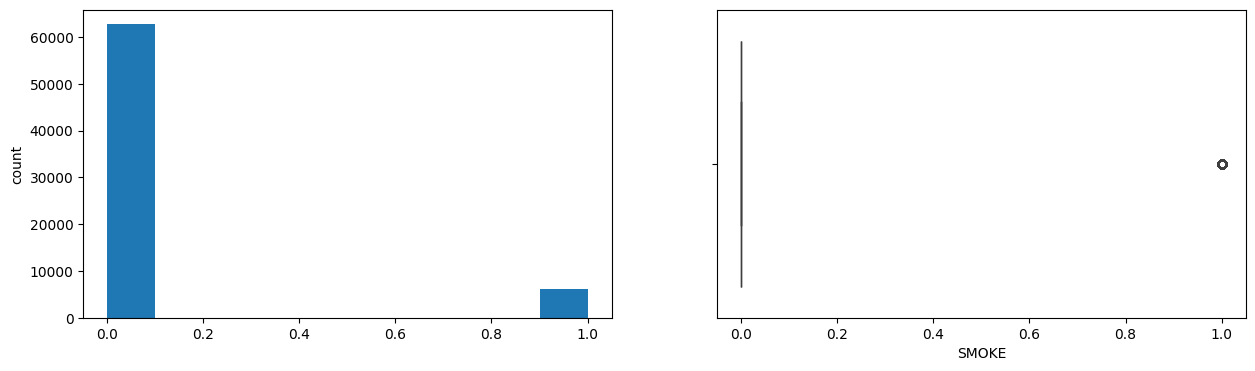

ALCOHOL
Skew : 3.96


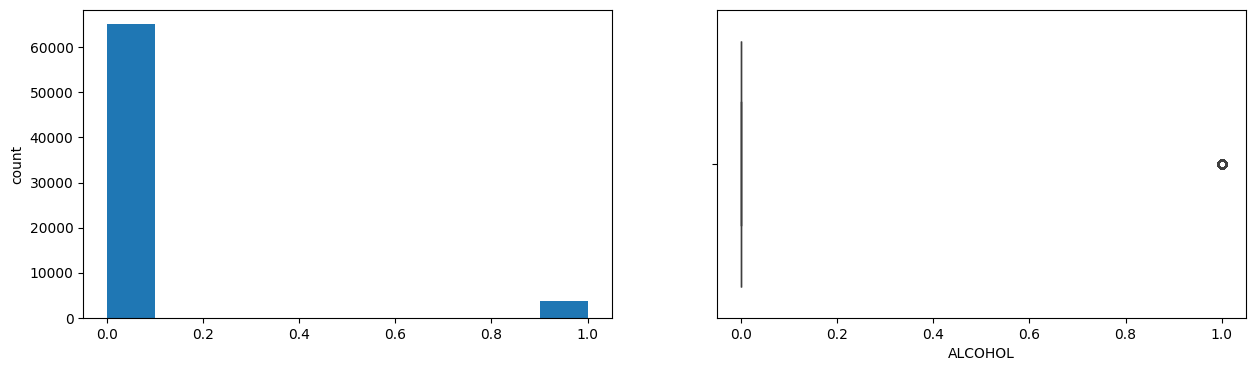

PHYSICAL_ACTIVITY
Skew : -1.53


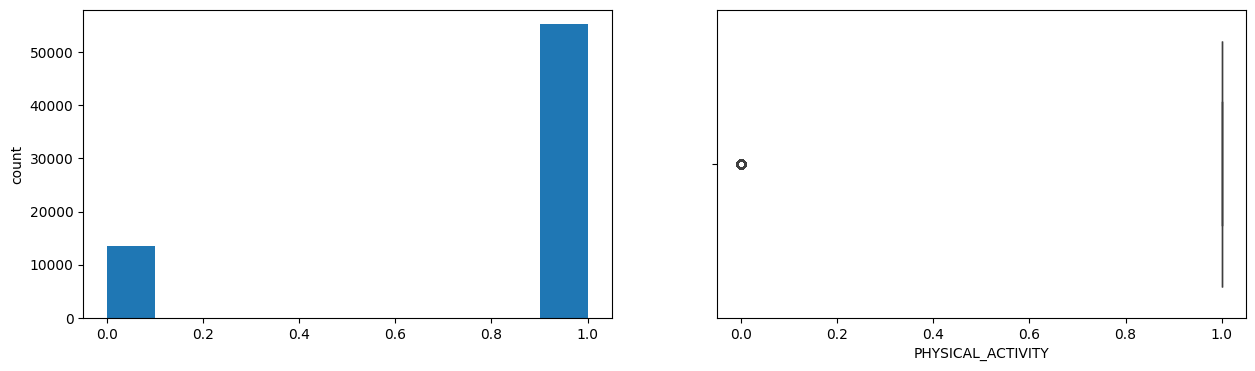

In [ ]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

**Model Training**

In [ ]:
x = original_df.drop(columns=['CARDIO_DISEASE'])
y = original_df['CARDIO_DISEASE']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)



**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

# Print the metrics
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")

Accuracy: 0.6357490731990987
Precision: 0.6368278762391109
Recall: 0.6205180740523928
F1 Score: 0.6285671929434438


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7089481718397906
Precision: 0.7097730980275841
Recall: 0.7004244109468755
F1 Score: 0.7050677666470242


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train_imputed, y_train)
y_pred_knn = knn_model.predict(X_test_imputed)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

# Print the metrics
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")

Accuracy: 0.6951370211528677
Precision: 0.7022842250498237
Recall: 0.6704229474608517
F1 Score: 0.6859838274932615


**Adaboast**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train_imputed, y_train)
y_pred_ada = adaboost_model.predict(X_test_imputed)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)

# Print the metrics
print(f"Accuracy: {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall: {recall_ada}")
print(f"F1 Score: {f1_ada}")

Accuracy: 0.7301737297375881
Precision: 0.769283865401208
Recall: 0.6524220693692375
F1 Score: 0.7060500475134621


**Naive Bais**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_imputed, y_train)
y_pred_nb = nb_model.predict(X_test_imputed)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb= f1_score(y_test, y_pred_nb)

# Print the metrics
print(f"Accuracy: {accuracy_nb}")
print(f"Precision: {precision_nb}")
print(f"Recall: {recall_nb}")
print(f"F1 Score: {f1_nb}")

Accuracy: 0.7143999418477865
Precision: 0.7702903946388682
Recall: 0.6055905166105664
F1 Score: 0.6780827529700942


**Support Vertor Machine**

In [ ]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train SVC model on imputed data
svm_model = SVC(random_state=42)
svm_model.fit(X_train_imputed, y_train)
y_pred_svm = svm_model.predict(X_test_imputed)

# Scale the imputed data for LinearSVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Train LinearSVC model on scaled and imputed data
svm_model_linear = LinearSVC(random_state=42, max_iter=10000) # Increased max_iter for convergence
svm_model_linear.fit(X_train_scaled, y_train)
y_pred_svm_linear = svm_model_linear.predict(X_test_scaled)

# You can choose to evaluate either y_pred_svm or y_pred_svm_linear
# For consistency with the evaluation cell below, let's use y_pred_svm
y_pred_svm = y_pred_svm_linear

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_svm= accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm= f1_score(y_test, y_pred_svm)

# Print the metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")

Accuracy: 0.7312640837391873
Precision: 0.7640619737285281
Recall: 0.6639836089565344
F1 Score: 0.7105160128415943


**XGBoost**

In [ ]:
from xgboost import XGBClassifier
xgboost_model = XGBClassifier(random_state=42)
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# Calculate the metrics
accuracy_xgb= accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb= recall_score(y_test, y_pred_xgb)
f1_xgb= f1_score(y_test, y_pred_xgb)

# Print the metrics
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")

Accuracy: 0.7337355528094788
Precision: 0.7536
Recall: 0.6893019171666911
F1 Score: 0.7200183444164182


**ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6007 - loss: 1.9385 - val_accuracy: 0.6799 - val_loss: 0.6127
Epoch 2/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6820 - loss: 0.6109 - val_accuracy: 0.7062 - val_loss: 0.5816
Epoch 3/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6953 - loss: 0.5904 - val_accuracy: 0.7130 - val_loss: 0.5696
Epoch 4/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7010 - loss: 0.5883 - val_accuracy: 0.7167 - val_loss: 0.5648
Epoch 5/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.7024 - loss: 0.5852 - val_accuracy: 0.7164 - val_loss: 0.5689
Epoch 6/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7046 - loss: 0.5832 - val_accuracy: 0.7140 - val_loss: 0.5711
Epoch 7/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7069 - loss: 0.5790 - val_accuracy: 0.7017 - val_loss: 0.5739
Epoch 8/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7099 - loss: 0.5780 - 

**LSTM**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define ANN model
ann_model = Sequential()
ann_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
ann_predictions = ann_model.predict(X_test)
y_pred_ann = (y_pred > 0.5).astype("int32")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)
f1 = f1_score(y_test, y_pred_ann)

# Output results
print(f"accuracy: {accuracy}")
print(f"precision: {precision}")
print(f"recall: {recall}")
print(f"F1 score: {f1}")


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1720/1720 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6124 - loss: 1.5592 - val_accuracy: 0.7056 - val_loss: 0.5788
Epoch 2/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6758 - loss: 0.6125 - val_accuracy: 0.7049 - val_loss: 0.5789
Epoch 3/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6930 - loss: 0.5963 - val_accuracy: 0.7143 - val_loss: 0.5661
Epoch 4/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6988 - loss: 0.5864 - val_accuracy: 0.7137 - val_loss: 0.5759
Epoch 5/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7040 - loss: 0.5825 - val_accuracy: 0.7130 - val_loss: 0.5690
Epoch 6/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7010 - loss: 0.5821 - val_accuracy: 0.7150 - val_loss: 0.5684
Epoch 7/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7036 - loss: 0.5802 - val_accuracy: 0.7155 - val_loss: 0.5642
Epoch 8/20
1720/1720 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7042 - loss: 0.5759 - val_accurac

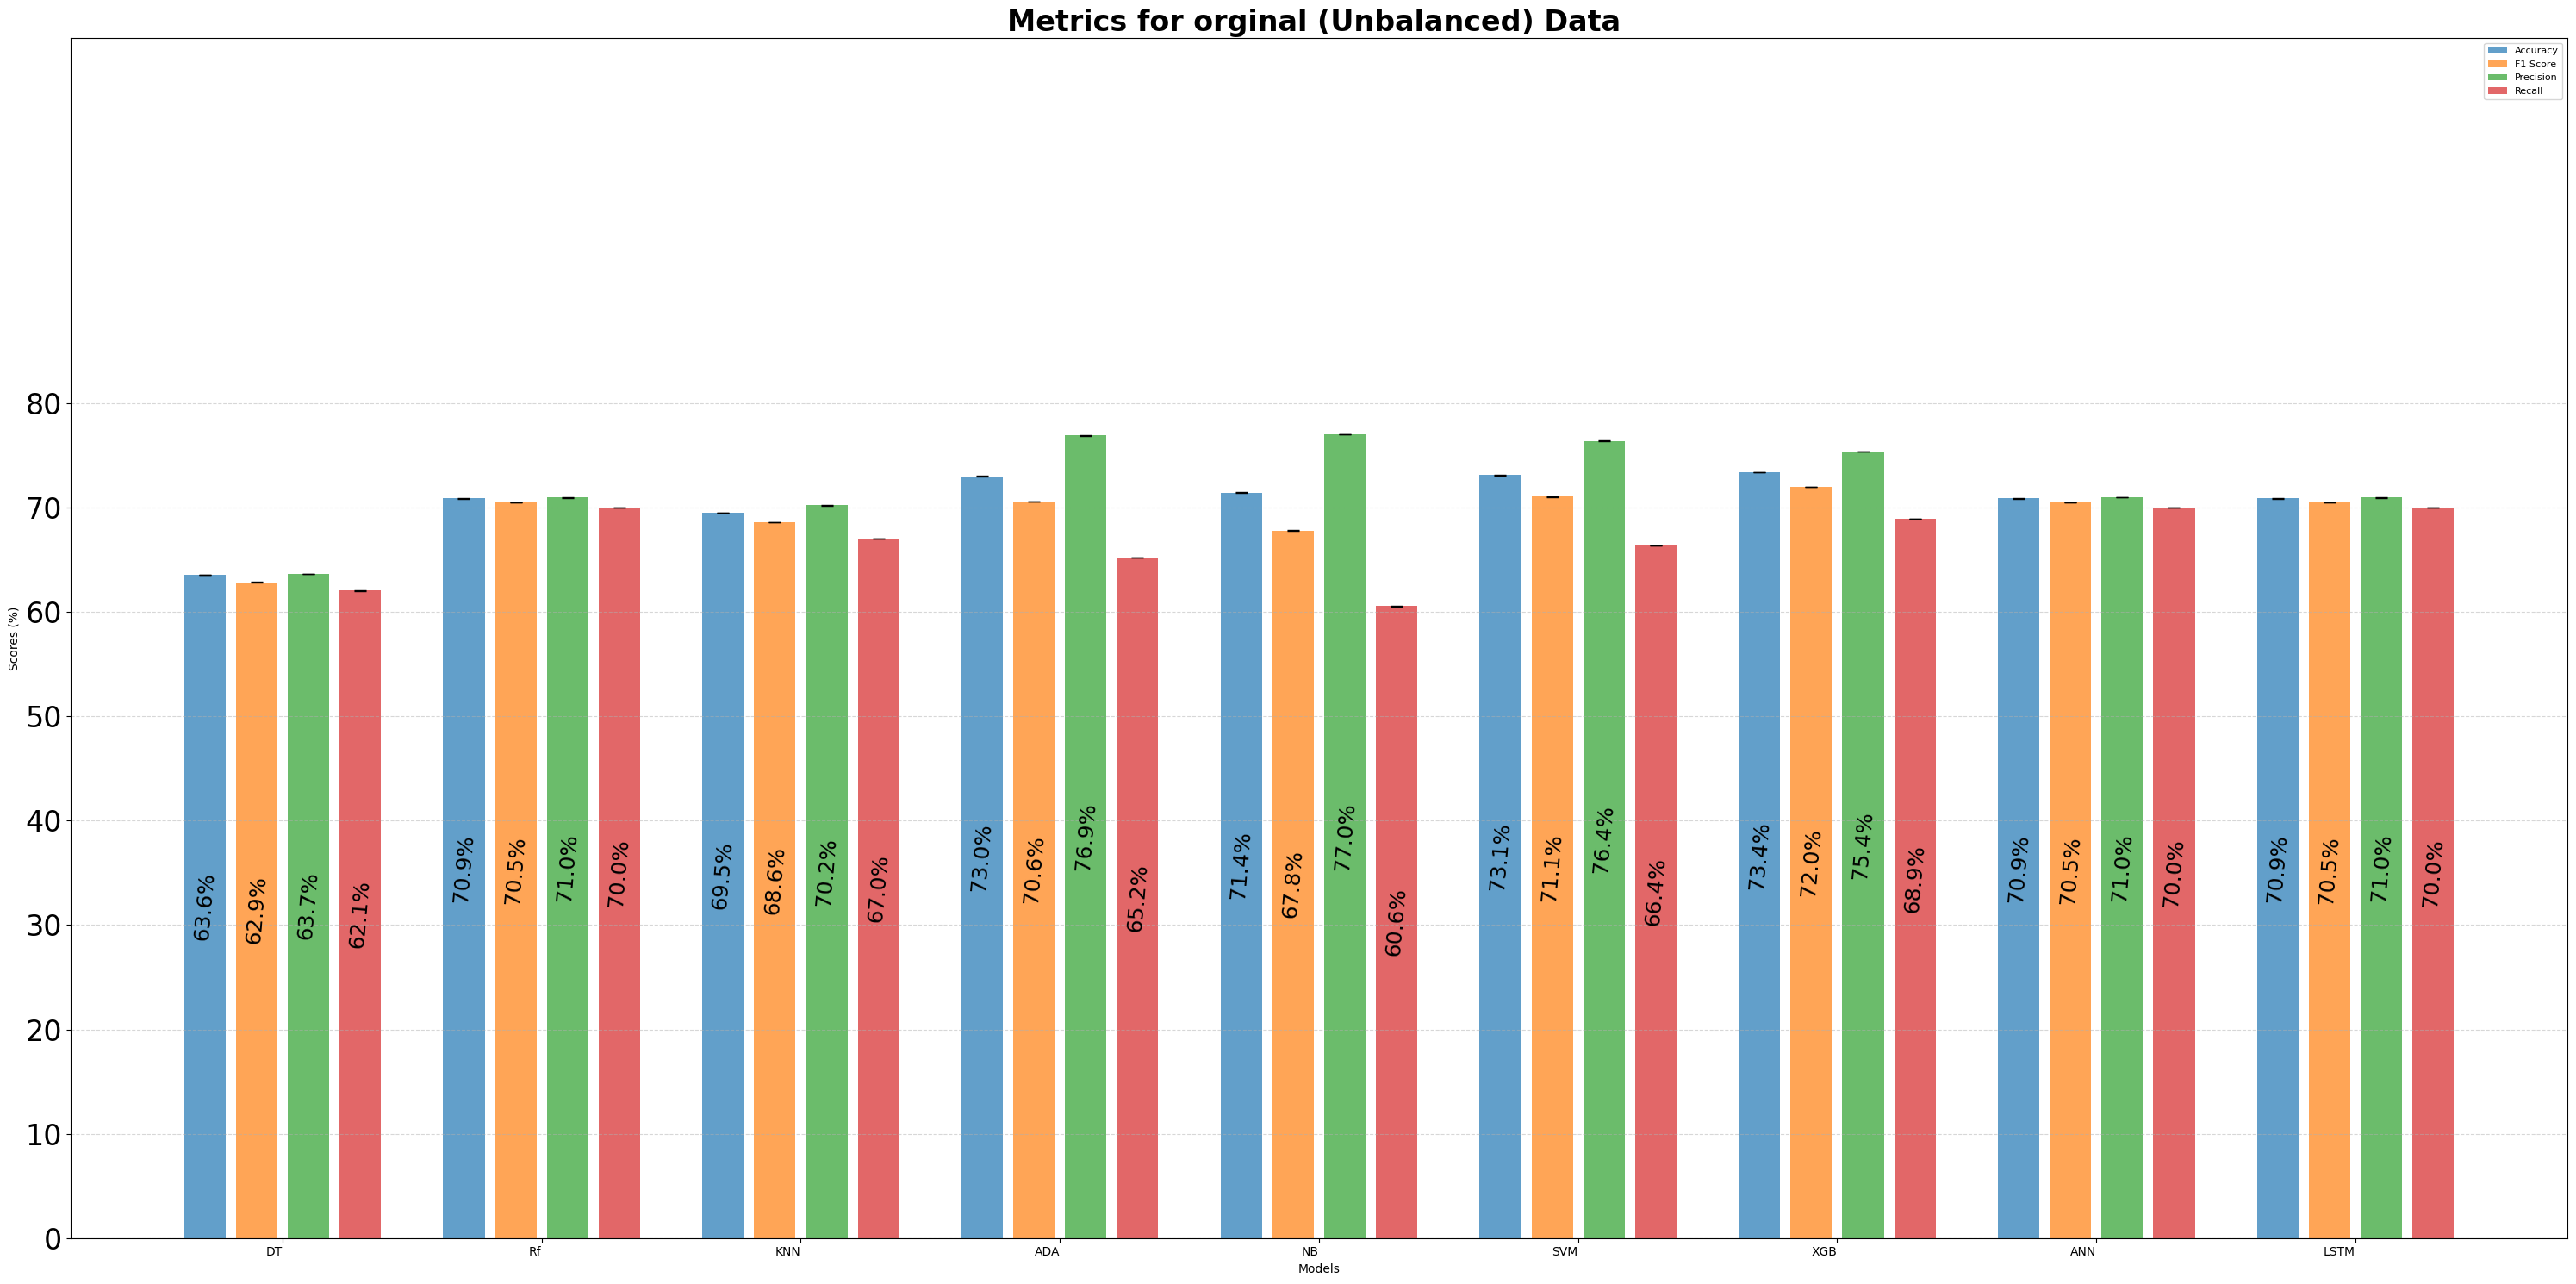

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and their corresponding metrics
models = ['DT', 'Rf', 'KNN', 'ADA', 'NB', 'SVM', 'XGB', 'ANN', 'LSTM' ]


# Accuracy, Precision, Recall, F1 Score for each model (updated based on the provided data)
accuracy = [100 * x for x in [
     0.6357490731990987, 0.7089481718397906, 0.6951370211528677 ,0.7301737297375881, 0.7143999418477865,
     0.7312640837391873,0.7337355528094788, 0.7089481718397906,0.7089481718397906]]

precision = [100 * x for x in [
    0.6368278762391109, 0.7097730980275841, 0.7022842250498237, 0.769283865401208,0.7702903946388682,
   0.7640619737285281,0.7536,0.7097730980275841,0.7097730980275841 ]]

recall = [100 * x for x in [

 0.6205180740523928, 0.7004244109468755,0.6704229474608517, 0.6524220693692375,0.6055905166105664, 0.6639836089565344,
 0.6893019171666911, 0.7004244109468755,0.7004244109468755]]

f1_scores_list = [100 * x for x in [

   0.6285671929434438, 0.7050677666470242 ,0.6859838274932615,0.7060500475134621, 0.6780827529700942,
   0.7105160128415943,0.7200183444164182,0.7050677666470242,0.7050677666470242
]]

# Dummy error values for error bars (calculated or assumed for the sake of this example)
error_accuracies = [0.02, 0.03, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02]
error_precisions = [0.01, 0.02, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.02]
error_recalls = [0.01, 0.01, 0.02, 0.01, 0.02, 0.01, 0.01, 0.01, 0.01 ]
error_f1_scores = [0.02, 0.03, 0.02, 0.02, 0.03, 0.02, 0.01, 0.02, 0.02 ]

# Metrics and labels
metrics = [accuracy, f1_scores_list, precision, recall]
metrics_labels = ['Accuracy', 'F1 Score', 'Precision', 'Recall']
metrics_errors = [error_accuracies, error_f1_scores, error_precisions, error_recalls]

# Bar chart setup
x_pos = np.arange(len(models))
width = 0.2  # Bar width

fig, ax = plt.subplots(figsize=(30, 15))

# Plot grouped bars with error bars
for i, (metric, label, errors) in enumerate(zip(metrics, metrics_labels, metrics_errors)):
    bar = ax.bar(
        x_pos + i * width, metric, width * 0.8, yerr=errors,
        label=label, alpha=0.7, ecolor='black', capsize=5
    )

    # Add labels for the bar values inside the bars
    for j, (rect, value) in enumerate(zip(bar, metric)):
        height = rect.get_height()

        offset_x = rect.get_x() + rect.get_width() / 2.0
        offset_y = height * 0.5

        # For `0.0%` values, place the text inside the bar with a small gap
        if value == 0.0:
            ax.text(
                offset_x,
                1,  # Add a small gap above the bottom of the bar
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=5,  # No rotation for 0.0%
                rotation_mode='anchor'
            )
        else:
            ax.text(
                offset_x,
                offset_y,
                f'{value:.1f}%',
                ha='center',
                va='center',
                fontsize=18,
                color='black',
                rotation=85,  # Rotate the non-zero text
                rotation_mode='anchor'
            )
x_pos_adjusted = x_pos.copy()
x_pos_adjusted[-1] += 0.2

# Styling and layout
ax.set_title('Metrics for orginal (Unbalanced) Data ', fontsize=24, weight='bold')
ax.set_xlabel('Models', fontsize=10)
ax.set_ylabel('Scores (%)', fontsize=10)
ax.set_xticks(x_pos + width * 1.5)
ax.set_xticklabels(models, ha= 'right', fontsize=10)
ax.set_ylim(0, 115)
ax.set_yticks(np.arange(0, 90, 10))
ax.tick_params(axis='y', labelsize=24)
ax.legend(fontsize=8, loc='upper right', bbox_to_anchor=(1, 1))
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Metrics for orginal (Unbalanced) Data .pdf', bbox_inches='tight')
plt.show()

**Correlation**

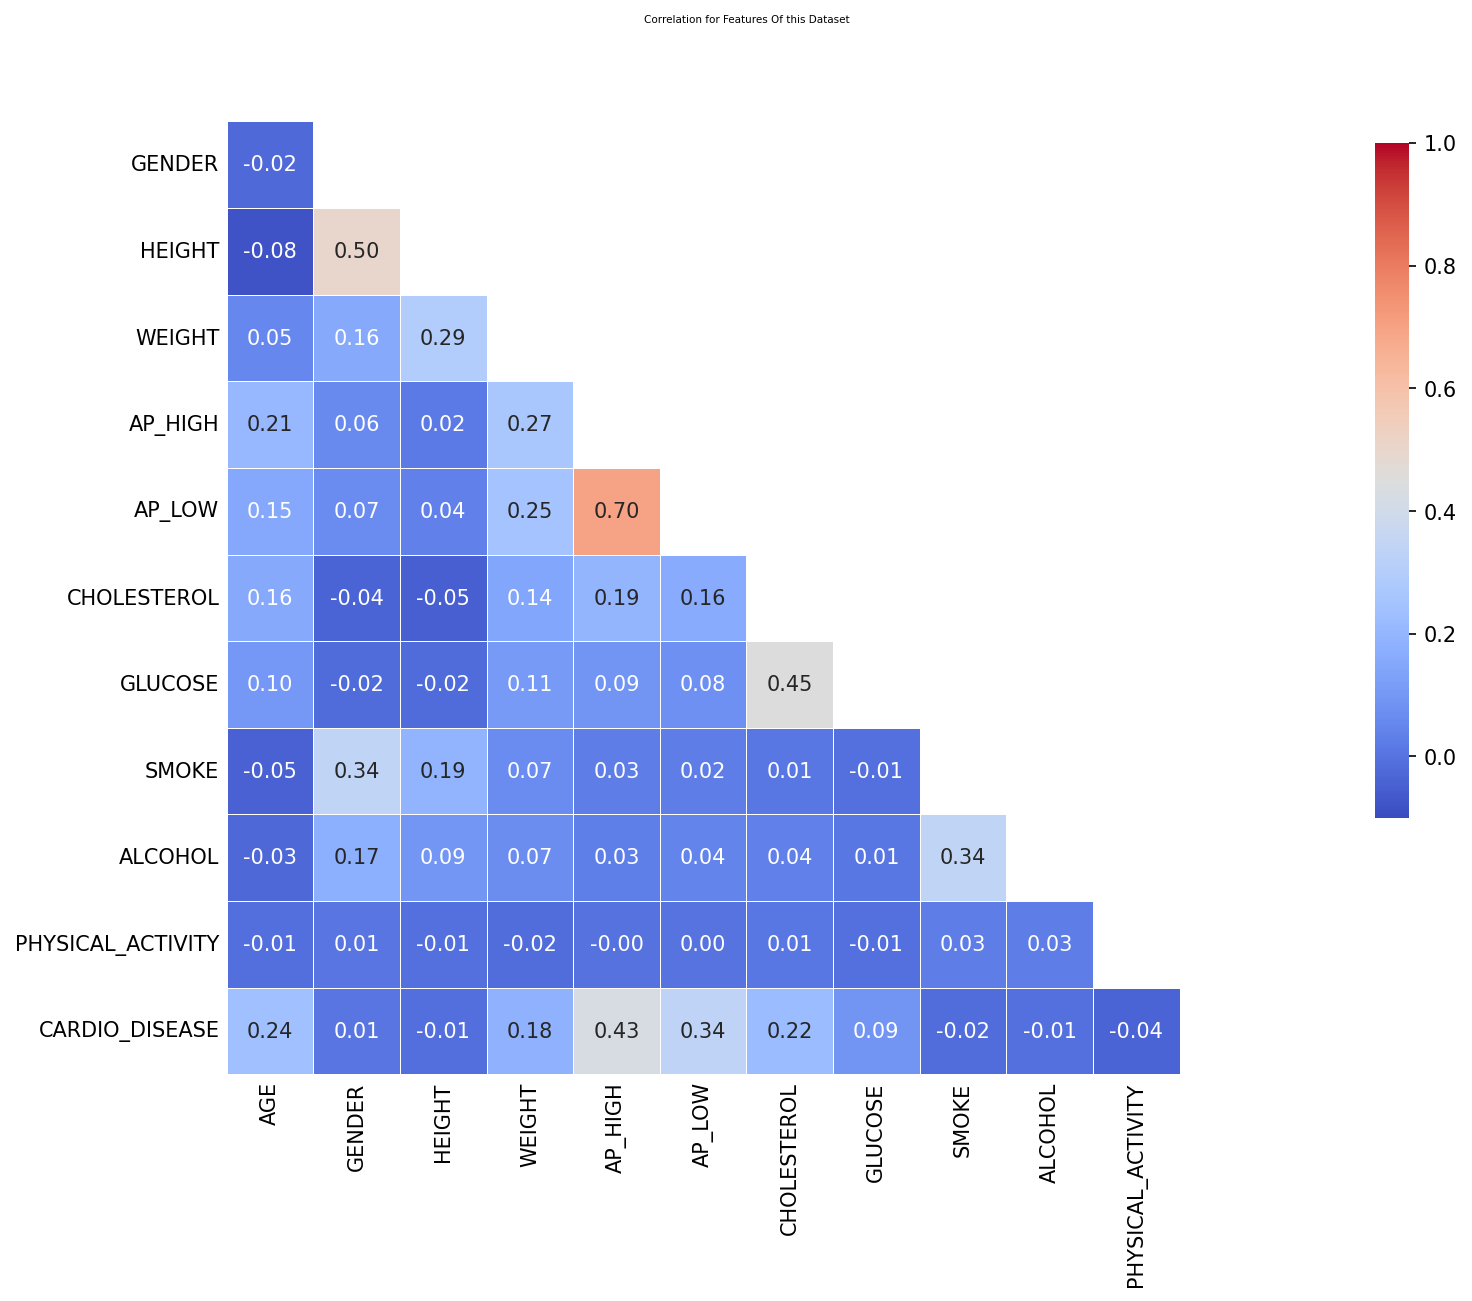

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the dataframe
df = pd.read_csv('/content/cardiovascular_diseases_dv3.csv', sep=';')


# Compute the correlation matrix
corr = df.corr(numeric_only=False)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9), dpi=150)

# Draw the heatmap with the mask
fig = sns.heatmap(corr, vmin=-0.1, vmax=1.0, mask=mask,
                  annot=True, fmt=".2f", cmap='coolwarm',
                  square=True, linewidths=0.3,
                  cbar_kws={"shrink":0.5,  "pad":0.000001})

# Get the colorbar from the axes
cbar = fig.collections[0].colorbar

cbar.ax.set_position([0.85, 0.3, 0.04, 0.5])
cust_labels = df.columns.tolist()
cust_labels[0] = ''
fig.set_yticklabels(cust_labels)
fig.tick_params(axis='y', which='both', length=0)
cust_labels = df.columns.tolist()
cust_labels[len(cust_labels)-1]= ''
fig.set_xticklabels(cust_labels)
fig.tick_params(axis='x', which='both', length=0)
plt.title("Correlation for Features Of this Dataset", fontsize=5)
plt.savefig("Correlation for Features of this Dataset .pdf", bbox_inches='tight') # save figure
plt.show()

**Gain Ratio**

In [ ]:
X_res = df.drop(columns=['CARDIO_DISEASE'])
y_res = df['CARDIO_DISEASE']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Split Information==
def split_information(X_res, feature):
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Gain Ratio
def gain_ratio(X_res, y_res, feature):
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# Compute Gain Ratios for all features
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
gain_ratio_results = pd.DataFrame(gain_ratios.items(), columns=['Feature', 'Gain Ratio'])
gain_ratio_results = gain_ratio_results.sort_values(by="Gain Ratio", ascending=False)

# Display the results
print(gain_ratio_results)

              Feature  Gain Ratio
4             AP_HIGH    0.059130
5              AP_LOW    0.047558
6         CHOLESTEROL    0.034552
0                 AGE    0.010217
7             GLUCOSE    0.008144
3              WEIGHT    0.004681
10  PHYSICAL_ACTIVITY    0.001396
8               SMOKE    0.000445
2              HEIGHT    0.000315
9             ALCOHOL    0.000162
1              GENDER    0.000040


**Plotting the gain ratios**

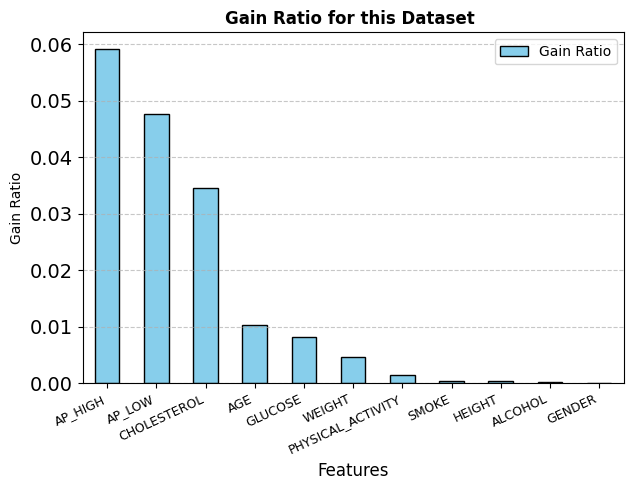

In [ ]:
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1, 2, 1)
gain_ratio_results.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax1)
ax1.set_title('Gain Ratio for this Dataset ', fontsize=12, fontweight='bold')
ax1.set_xlabel('Features', fontsize=12)
ax1.set_ylabel('Gain Ratio', fontsize=10)
ax1.set_xticklabels(gain_ratio_results['Feature'], rotation=25, ha='right', fontsize=9)
ax1.tick_params(axis='y', labelsize=14)  # Correct way to set y-tick label size
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("Gain Ratio for this Dataset.pdf") # save figure
plt.show()

**Information Gain**

In [ ]:
X_res = df.drop(columns=['CARDIO_DISEASE'])
y_res = df['CARDIO_DISEASE']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import log_loss

# Compute Entropy of a distribution
def entropy(y_res):
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

# Compute Information Gain
def information_gain(X_res, y_res, feature):
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += len(subset) / len(X_res) * entropy(subset)
    return base_entropy - feature_entropy

# Compute Information Gains for all features
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}

# Convert to a DataFrame for easy visualization
information_gain_results = pd.DataFrame(information_gains.items(), columns=['Feature', 'Information Gain'])
information_gain_results = information_gain_results.sort_values(by="Information Gain", ascending=False)

# Display the results
print(information_gain_results)

              Feature  Information Gain
4             AP_HIGH          0.168258
5              AP_LOW          0.103464
0                 AGE          0.044667
6         CHOLESTEROL          0.036633
3              WEIGHT          0.026714
7             GLUCOSE          0.006184
2              HEIGHT          0.001555
10  PHYSICAL_ACTIVITY          0.000998
8               SMOKE          0.000191
9             ALCOHOL          0.000049
1              GENDER          0.000038


**Plot the Information Gain**

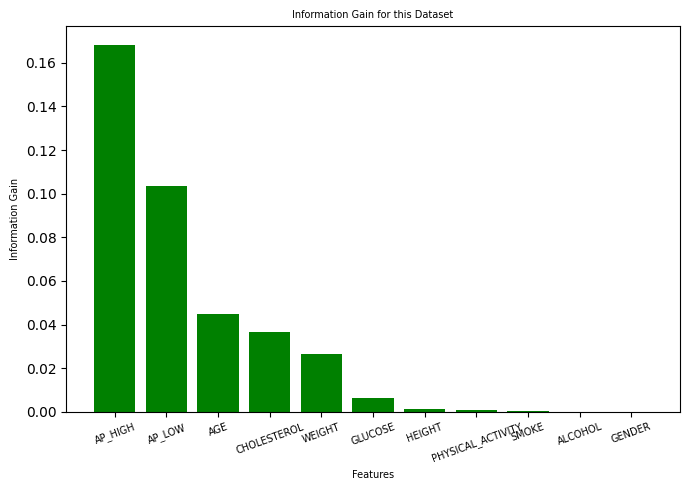

In [ ]:
import matplotlib.pyplot as plt

ig_df = information_gain_results.reset_index(drop=True)  # Reset index for clean plotting
ig_df.columns = ['Feature', 'IG']  # Rename columns for convenience

# Plot the Information Gain
plt.figure(figsize=(7, 5))
plt.bar(ig_df['Feature'], ig_df['IG'], color='green')
plt.xlabel('Features', fontsize=7)
plt.xticks(fontsize=7, rotation=20)
plt.ylabel('Information Gain', fontsize=7)
plt.title('Information Gain for this Dataset', fontsize=7)
plt.tight_layout()  # To ensure proper spacing for labels

# Save the plot as a PDF file
plt.savefig("Information Gain for this Dataset.pdf", bbox_inches='tight')

# Display the plot
plt.show()

**Pearson Correlation Coefficient**

In [ ]:
corr_matrix = df.corr(method="pearson")

print("Pearson Correlation Matrix:\n", corr_matrix)

Pearson Correlation Matrix:
                         AGE    GENDER    HEIGHT    WEIGHT   AP_HIGH    AP_LOW  \
AGE                1.000000 -0.023320 -0.081430  0.054581  0.208731  0.152635   
GENDER            -0.023320  1.000000  0.499350  0.155896  0.061296  0.066546   
HEIGHT            -0.081430  0.499350  1.000000  0.291772  0.018459  0.035453   
WEIGHT             0.054581  0.155896  0.291772  1.000000  0.269192  0.249215   
AP_HIGH            0.208731  0.061296  0.018459  0.269192  1.000000  0.697923   
AP_LOW             0.152635  0.066546  0.035453  0.249215  0.697923  1.000000   
CHOLESTEROL        0.155305 -0.036666 -0.050553  0.141047  0.193975  0.158605   
GLUCOSE            0.098960 -0.021172 -0.018734  0.106949  0.092584  0.076269   
SMOKE             -0.048080  0.338773  0.188316  0.066980  0.027047  0.024704   
ALCOHOL           -0.029200  0.171083  0.094804  0.068039  0.032497  0.043543   
PHYSICAL_ACTIVITY -0.010330  0.005744 -0.007415 -0.017678 -0.001230  0.000265   

**Gain Ratio = IG / H(X)**

In [ ]:
# Step 0: Strip any extra spaces from column names
X_res.columns = X_res.columns.str.strip()

# -------------------------------
# Loop through all features to calculate IG and GR
info_gain = []
gain_ratio = []

for feature in X_res.columns:
    IG = information_gain(X_res, y_res, feature)
    feature_entropy = split_information(X_res, feature)
    GR = IG / feature_entropy if feature_entropy > 0 else 0

    info_gain.append(IG)
    gain_ratio.append(GR)

# Create a DataFrame for easy visualization
feature_scores = pd.DataFrame({
    'Feature': X_res.columns,
    'Information_Gain': info_gain,
    'Gain_Ratio': gain_ratio
})

print("\nFeature Scores:")
print(feature_scores)


Feature Scores:
              Feature  Information_Gain  Gain_Ratio
0                 AGE          0.044667    0.010217
1              GENDER          0.000038    0.000040
2              HEIGHT          0.001555    0.000315
3              WEIGHT          0.026714    0.004681
4             AP_HIGH          0.168258    0.059130
5              AP_LOW          0.103464    0.047558
6         CHOLESTEROL          0.036633    0.034552
7             GLUCOSE          0.006184    0.008144
8               SMOKE          0.000191    0.000445
9             ALCOHOL          0.000049    0.000162
10  PHYSICAL_ACTIVITY          0.000998    0.001396


**Pearson Correlation Coefficient**

In [ ]:
corr_matrix = df.corr(method="pearson")

print("Pearson Correlation Matrix:\n", corr_matrix)

Pearson Correlation Matrix:
                         AGE    GENDER    HEIGHT    WEIGHT   AP_HIGH    AP_LOW  \
AGE                1.000000 -0.023320 -0.081430  0.054581  0.208731  0.152635   
GENDER            -0.023320  1.000000  0.499350  0.155896  0.061296  0.066546   
HEIGHT            -0.081430  0.499350  1.000000  0.291772  0.018459  0.035453   
WEIGHT             0.054581  0.155896  0.291772  1.000000  0.269192  0.249215   
AP_HIGH            0.208731  0.061296  0.018459  0.269192  1.000000  0.697923   
AP_LOW             0.152635  0.066546  0.035453  0.249215  0.697923  1.000000   
CHOLESTEROL        0.155305 -0.036666 -0.050553  0.141047  0.193975  0.158605   
GLUCOSE            0.098960 -0.021172 -0.018734  0.106949  0.092584  0.076269   
SMOKE             -0.048080  0.338773  0.188316  0.066980  0.027047  0.024704   
ALCOHOL           -0.029200  0.171083  0.094804  0.068039  0.032497  0.043543   
PHYSICAL_ACTIVITY -0.010330  0.005744 -0.007415 -0.017678 -0.001230  0.000265   

**Gain Ratio = IG / H(X)**

In [ ]:
# Step 0: Strip any extra spaces from column names
X_res.columns = X_res.columns.str.strip()

# -------------------------------
# Loop through all features to calculate IG and GR
info_gain = []
gain_ratio = []

for feature in X_res.columns:
    IG = information_gain(X_res, y_res, feature)
    feature_entropy = split_information(X_res, feature)
    GR = IG / feature_entropy if feature_entropy > 0 else 0

    info_gain.append(IG)
    gain_ratio.append(GR)

# Create a DataFrame for easy visualization
feature_scores = pd.DataFrame({
    'Feature': X_res.columns,
    'Information_Gain': info_gain,
    'Gain_Ratio': gain_ratio
})

print("\nFeature Scores:")
print(feature_scores)


Feature Scores:
              Feature  Information_Gain  Gain_Ratio
0                 AGE          0.044667    0.010217
1              GENDER          0.000038    0.000040
2              HEIGHT          0.001555    0.000315
3              WEIGHT          0.026714    0.004681
4             AP_HIGH          0.168258    0.059130
5              AP_LOW          0.103464    0.047558
6         CHOLESTEROL          0.036633    0.034552
7             GLUCOSE          0.006184    0.008144
8               SMOKE          0.000191    0.000445
9             ALCOHOL          0.000049    0.000162
10  PHYSICAL_ACTIVITY          0.000998    0.001396


**Encode categorical**

**Feature selection / feature importance analysis**

              Feature  Pearson_r  Mutual_Info  Info_Gain  Gain_Ratio  \
4             AP_HIGH   0.381236     1.000000   1.000000    1.000000   
5              AP_LOW   0.415884     0.669772   0.614827    0.804173   
6         CHOLESTEROL   0.618203     0.257580   0.217546    0.584061   
8               SMOKE   1.000000     0.010883   0.000915    0.006858   
9             ALCOHOL   0.990746     0.000000   0.000067    0.002056   
0                 AGE   0.170314     0.272681   0.265305    0.172231   
1              GENDER   0.542878     0.000000   0.000000    0.000000   
10  PHYSICAL_ACTIVITY   0.409749     0.077593   0.005712    0.022947   
7             GLUCOSE   0.236991     0.046856   0.036540    0.137141   
3              WEIGHT   0.000000     0.152532   0.158579    0.078539   

    Combined_Score  
4         0.845309  
5         0.626164  
6         0.419347  
8         0.254664  
9         0.248217  
0         0.220133  
1         0.135720  
10        0.129000  
7         0.114382

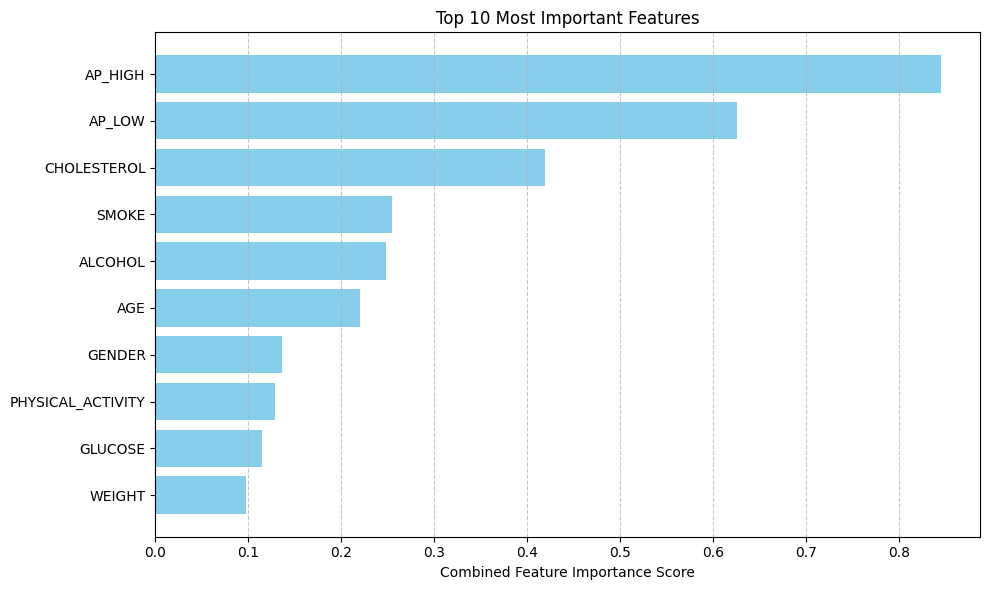

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# -------------------------------
# Step 0: Clean column names and handle missing values
X_res.columns = X_res.columns.str.strip()      # remove extra spaces
# Convert 'object' columns to numeric using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
object_cols = X_res.select_dtypes(include='object').columns

for col in object_cols:
    X_res[col] = X_res[col].astype(str)  # Ensure all values are strings
    X_res[col] = label_encoder.fit_transform(X_res[col])

X_res = X_res.fillna(X_res.mean())                 # fill NaN with mean

# -------------------------------
# Step 1: Calculate Information Gain & Gain Ratio
info_gain = []
gain_ratio = []

for feature in X_res.columns:
    IG = information_gain(X_res, y_res, feature)            # your function
    feature_entropy = split_information(X_res, feature) # your function
    GR = IG / feature_entropy if feature_entropy > 0 else 0
    info_gain.append(IG)
    gain_ratio.append(GR)

# -------------------------------
# Step 2: Calculate Mutual Information scores
mi_scores = mutual_info_classif(X_res, y_res, discrete_features='auto', random_state=42)


# -------------------------------
# Step 3: Calculate Pearson correlation with target
if 'TenYearCHD' in X_res.columns:
    pearson_corr = X_res.corr(numeric_only=True)['TenYearCHD'].drop('TenYearCHD')
else:
    pearson_corr = X_res.corr(numeric_only=True).iloc[:,-1].drop(X_res.columns[-1]) # Assuming target is the last column


pearson_df = pd.DataFrame({'Feature': pearson_corr.index, 'Pearson_r': pearson_corr.values})
pearson_df.set_index('Feature', inplace=True)

# -------------------------------
# Step 4: Combine all feature scores
score_df = pd.DataFrame({
    'Feature': X_res.columns,
    'Pearson_r': [pearson_df.loc[f, 'Pearson_r'] if f in pearson_df.index else 0 for f in X_res.columns],
    'Mutual_Info': mi_scores,
    'Info_Gain': info_gain,
    'Gain_Ratio': gain_ratio
})

# -------------------------------
# Step 5: Normalize scores (0-1 scale)
scaler = MinMaxScaler()
score_df[['Pearson_r', 'Mutual_Info', 'Info_Gain', 'Gain_Ratio']] = scaler.fit_transform(
    score_df[['Pearson_r', 'Mutual_Info', 'Info_Gain', 'Gain_Ratio']]
)

# -------------------------------
# Step 6: Compute combined score and sort
score_df['Combined_Score'] = score_df[['Pearson_r', 'Mutual_Info', 'Info_Gain', 'Gain_Ratio']].mean(axis=1)
score_df.sort_values('Combined_Score', ascending=False, inplace=True)

# -------------------------------
# Step 7: Display top 10 features
print(score_df.head(10))

# -------------------------------
# Step 8: Plot top 10 features
top_features = score_df.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Combined_Score'][::-1], color='skyblue')
plt.xlabel('Combined Feature Importance Score')
plt.title('Top 10 Most Important Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Feature Selection**

In [ ]:
# Top features based on Info Gain
selected_features = score_df.head(6)["Feature"].tolist()
print("Selected Features:", selected_features)

Selected Features: ['AP_HIGH', 'AP_LOW', 'CHOLESTEROL', 'SMOKE', 'ALCOHOL', 'AGE']


**Pearson correlation matrix visually**

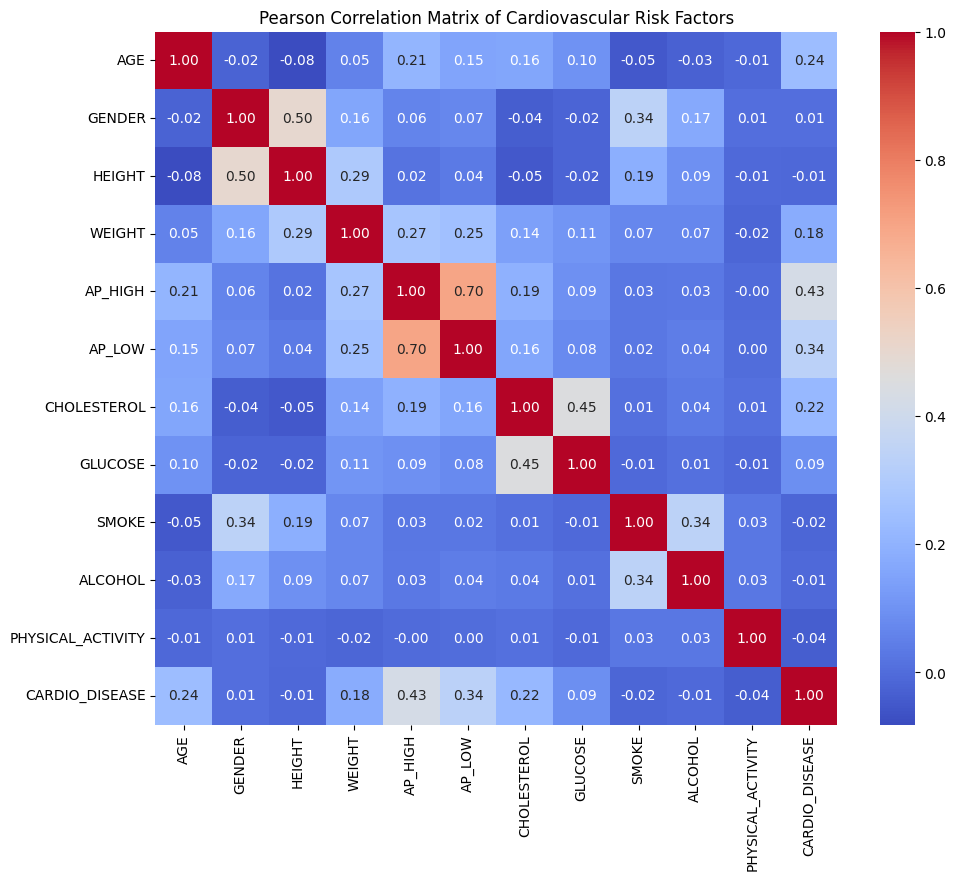

In [ ]:
# Heatmap for visualization
plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Pearson Correlation Matrix of Cardiovascular Risk Factors")
plt.show()

**Feature importance visually compare**

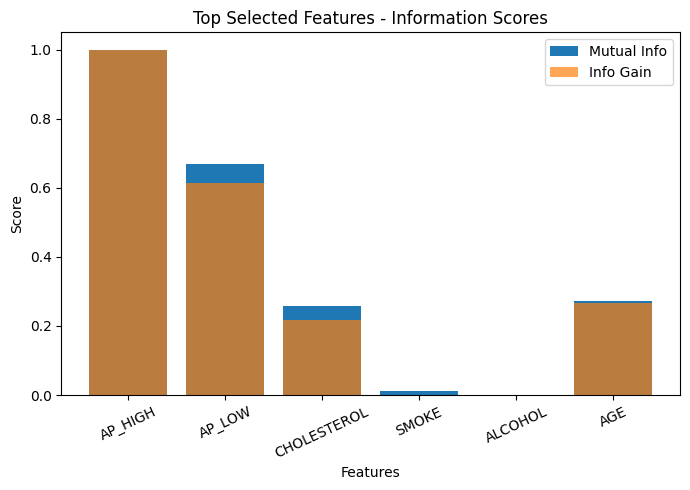

In [ ]:
# Bar Chart
plt.figure(figsize=(7,5))
plt.bar(score_df["Feature"][:6], score_df["Mutual_Info"][:6], label="Mutual Info")
plt.bar(score_df["Feature"][:6], score_df["Info_Gain"][:6], alpha=0.7, label="Info Gain")
plt.title("Top Selected Features - Information Scores")
plt.xlabel("Features")
plt.ylabel("Score")
plt.legend()
plt.xticks(rotation=25)
plt.tight_layout()
plt.savefig("cardio_feature_importance_bar.png")
plt.show()

**Top selected Feature & CARDIO_DISEASE relation visualition**

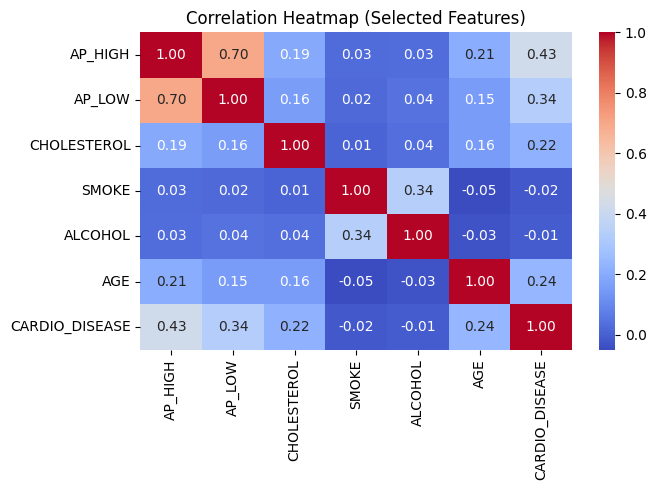

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(7,5))
# Convert top_features to a list before subsetting the dataframe
sns.heatmap(df[selected_features + ['CARDIO_DISEASE']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.tight_layout()
plt.savefig("CARDIO_DISEASE_feature_correlation_heatmap.png")
plt.show()

**Hybrid feature selection**


✅ Hybrid Feature Importance Ranking (Top Features):

              Feature  Correlation  Information Gain  Gain Ratio  Hybrid Score
4             AP_HIGH     1.000000          1.000000    1.000000      1.000000
5              AP_LOW     0.784535          0.614827    0.804173      0.739514
6         CHOLESTEROL     0.512815          0.217546    0.584061      0.445608
0                 AGE     0.554969          0.265305    0.172231      0.353249
3              WEIGHT     0.412702          0.158579    0.078539      0.236217
7             GLUCOSE     0.198340          0.036540    0.137141      0.131440
10  PHYSICAL_ACTIVITY     0.071747          0.005712    0.022947      0.037297
8               SMOKE     0.021706          0.000915    0.006858      0.011014
2              HEIGHT     0.008466          0.009018    0.004657      0.007489
9             ALCOHOL     0.002412          0.000067    0.002056      0.001602

🎯 Top Selected Features: ['AP_HIGH', 'AP_LOW', 'CHOLESTEROL', 'AGE', 'WEIGHT

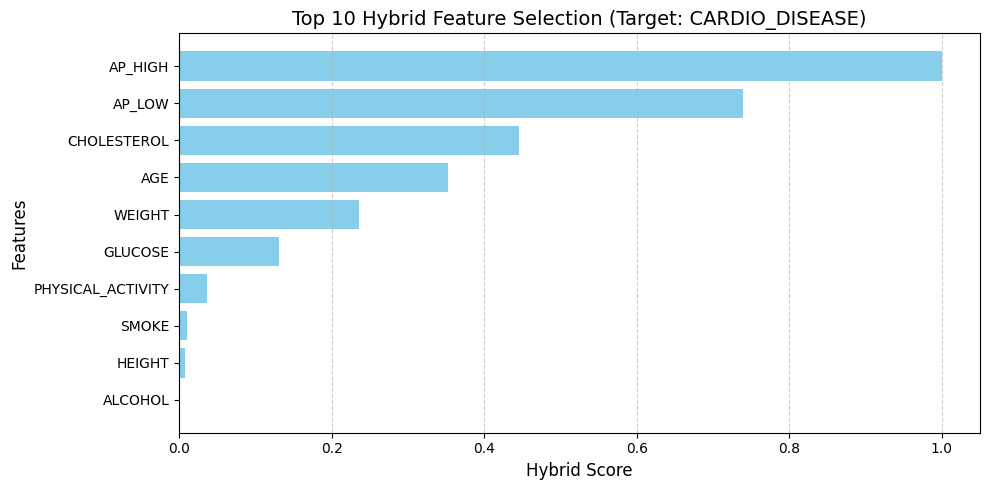

In [ ]:
# ✅ Hybrid Feature Selection for Target: CARDIO_DISEASE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# Step 1: Prepare Data
# ======================================
target_column = 'CARDIO_DISEASE'  # Target variable
X_res = df.drop(columns=[target_column])
y_res = df[target_column]

# ======================================
# Step 2: Compute Correlation
# ======================================
corr = df.corr(numeric_only=True)
target_corr = corr[target_column].abs().sort_values(ascending=False)
target_corr = target_corr.drop(target_column, errors='ignore')

# ======================================
# Step 3: Define Functions (Entropy, IG, GR)
# ======================================
def entropy(y_res):
    """Compute entropy of the target variable"""
    value_counts = y_res.value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def information_gain(X_res, y_res, feature):
    """Compute Information Gain for one feature"""
    base_entropy = entropy(y_res)
    feature_entropy = 0
    for value in X_res[feature].unique():
        subset = y_res[X_res[feature] == value]
        feature_entropy += (len(subset) / len(X_res)) * entropy(subset)
    return base_entropy - feature_entropy

def split_information(X_res, feature):
    """Compute Split Information"""
    value_counts = X_res[feature].value_counts(normalize=True)
    return -np.sum(value_counts * np.log2(value_counts + 1e-9))

def gain_ratio(X_res, y_res, feature):
    """Compute Gain Ratio"""
    ig = information_gain(X_res, y_res, feature)
    si = split_information(X_res, feature)
    return ig / (si + 1e-9)

# ======================================
# Step 4: Compute IG & GR for all features
# ======================================
information_gains = {feature: information_gain(X_res, y_res, feature) for feature in X_res.columns}
gain_ratios = {feature: gain_ratio(X_res, y_res, feature) for feature in X_res.columns}

# ======================================
# Step 5: Combine Scores into a Hybrid Metric
# ======================================
hybrid_df = pd.DataFrame({
    'Feature': X_res.columns,
    'Correlation': [target_corr.get(f, 0) for f in X_res.columns],
    'Information Gain': [information_gains[f] for f in X_res.columns],
    'Gain Ratio': [gain_ratios[f] for f in X_res.columns]
})

# Normalize all scores (0–1)
for col in ['Correlation', 'Information Gain', 'Gain Ratio']:
    min_val = hybrid_df[col].min()
    max_val = hybrid_df[col].max()
    hybrid_df[col] = (hybrid_df[col] - min_val) / (max_val - min_val + 1e-9)

# Weighted Hybrid Score (you can adjust weights)
hybrid_df['Hybrid Score'] = (
    0.4 * hybrid_df['Correlation'] +
    0.3 * hybrid_df['Information Gain'] +
    0.3 * hybrid_df['Gain Ratio']
)

# ======================================
# Step 6: Sort and Select Top Features
# ======================================
hybrid_df = hybrid_df.sort_values(by='Hybrid Score', ascending=False)
top_n = 10  # Change this number to select more/less top features
top_features = hybrid_df.head(top_n)['Feature'].tolist()

print("\n✅ Hybrid Feature Importance Ranking (Top Features):\n")
print(hybrid_df.head(top_n))

print("\n🎯 Top Selected Features:", top_features)

# ======================================
# Step 7: Visualize Hybrid Scores
# ======================================
plt.figure(figsize=(10, 5))
plt.barh(hybrid_df.head(top_n)['Feature'], hybrid_df.head(top_n)['Hybrid Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.title(f"Top {top_n} Hybrid Feature Selection (Target: CARDIO_DISEASE)", fontsize=14)
plt.xlabel("Hybrid Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
